<a href="https://colab.research.google.com/github/AlexCamposDosSantos/ProjetoRegressao/blob/main/Projeto_RegLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montar drive Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análise de Qualidade de Dados: Identificação e Percentual de Valores Ausentes


Este bloco análise inicial do arquivo CSV, carregando os dados em um DataFrame. Em seguida, verifica a presença de valores ausentes, calculando a quantidade e o percentual de valores ausentes por coluna e identificando quantas linhas possuem pelo menos um valor ausente. Os resultados são impressos para avaliar a qualidade dos dados.

In [3]:
import pandas as pd
from IPython.display import display

#Caminho para o arquivo CSV armazenado no Google Drive
caminho_csv = '/content/drive/My Drive/top_insta_influencers_data.csv'

# Carregar o arquivo CSV em um DataFrame - vírgula como separador'
df = pd.read_csv(caminho_csv, sep=',', encoding='utf-8-sig')

# Identificar a quantidade e porcentagem de valores ausentes em cada coluna
valores_ausentes = df.isnull().sum()
percentual_ausentes = (valores_ausentes / len(df)) * 100

# Contagem número de linhas que possuem pelo menos um valor ausente
total_linhas_com_ausentes = df.isnull().any(axis=1).sum()

# Imprimir as informações sobre valores ausentes
print("Quantidade de valores ausentes por coluna:")
print(valores_ausentes)

print("\nPercentual de valores ausentes por coluna (%):")
print(percentual_ausentes)

print(f"\nTotal de valores (linhas) ausentes: {total_linhas_com_ausentes} ({(total_linhas_com_ausentes / len(df)) * 100:.2f}%)")

Quantidade de valores ausentes por coluna:
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

Percentual de valores ausentes por coluna (%):
rank                  0.0
channel_info          0.0
influence_score       0.0
posts                 0.0
followers             0.0
avg_likes             0.0
60_day_eng_rate       0.0
new_post_avg_like     0.0
total_likes           0.0
country              31.0
dtype: float64

Total de valores (linhas) ausentes: 62 (31.00%)


**A análise revelou que, no conjunto de dados, todas as colunas, exceto a de "country", não possuem valores ausentes. A coluna "country" apresenta 62 valores ausentes, o que representa 31% do total de linhas. Isso indica que um tratamento específico para essa coluna pode ser necessário, como preenchimento ou remoção das linhas com dados faltantes.**

#Análise exploratória: Gráfico de correlação (Heatmap)

Este código transforma valores no DataFrame, convertendo sufixos de unidades (k, m, b) em valores numéricos e aplicando essa conversão nas colunas de posts, followers, avg_likes, new_post_avg_like e total_likes. Na coluna 60_day_eng_rate, remove-se o símbolo '%' e os valores são convertidos para decimais.

In [10]:
drive.mount('/content/drive')

arquivo_path = '/content/drive/My Drive/top_insta_influencers_data.csv'

df = pd.read_csv(arquivo_path, sep=',', encoding='utf-8-sig')

# convertendo valores com unidades k, m, b e %
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
    return float(value)

# Selecionando colunas para serem convertidas em númerico
columns_to_convert = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numeric)

# Convertendo valores da coluna 60_day_eng_rate para decimais
df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float)
df['60_day_eng_rate'] = df['60_day_eng_rate'] / 100

# Evitar o formato científico
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0000,475800000.0000,8700000.0000,0.0139,6500000.0000,29000000000.0000,Spain
1,2,kyliejenner,91,6900.0000,366200000.0000,8300000.0000,0.0162,5900000.0000,57400000000.0000,United States
2,3,leomessi,90,890.0000,357300000.0000,6800000.0000,0.0124,4400000.0000,6000000000.0000,NaN
3,4,selenagomez,93,1800.0000,342700000.0000,6200000.0000,0.0097,3300000.0000,11500000000.0000,United States
4,5,therock,91,6800.0000,334100000.0000,1900000.0000,0.0020,665300.0000,12500000000.0000,United States


Este código gera um heatmap para visualizar a correlação entre as variáveis numéricas do DataFrame. Ele calcula a matriz de correlação e exibe o gráfico com os valores de correlação anotados, utilizando a paleta de cores 'coolwarm'.

Correlação entre 'rank' e 'followers':
             rank  followers
rank       1.0000    -0.6988
followers -0.6988     1.0000


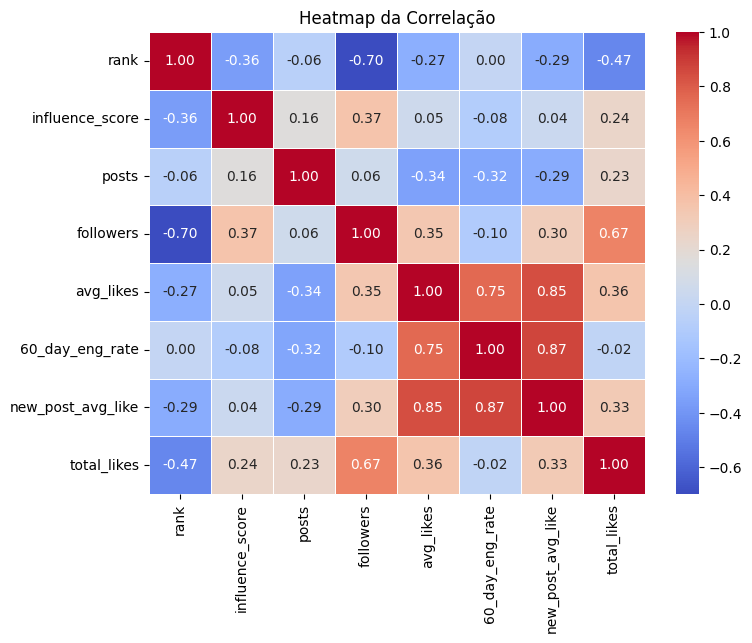

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['number'])

# Criando a matriz de correlação
corr_matrix = df_numeric.corr()

# Calculando a correlação específica entre 'rank' e 'followers'
corr_rank_followers = df[['rank', 'followers']].corr()
print("Correlação entre 'rank' e 'followers':")
print(corr_rank_followers)

# Criando o heatmap para todas as correlações numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap da Correlação')
plt.show()

Principais observações do gráfico:

Correlação negativa moderada: A correlação entre rank e followers é de -0.70, indicando uma correlação negativa moderada. Isso significa que, à medida que o rank melhora (com valores mais baixos representando melhores posições), o número de seguidores tende a ser maior. Em outras palavras, contas com um ranking mais alto (melhor posição) estão associadas a um número maior de seguidores.

# Análise de Outliers

Após a conversão dos dados, o código plota gráficos do tipo boxplot para as colunas 'avg_likes' e 'new_post_avg_like', ajudando a visualizar a presença de outliers. Para identificar outliers de forma mais detalhada, é utilizada a técnica do Intervalo Interquartil (IQR), que calcula os limites inferior e superior para cada coluna e identifica os dados fora desses limites como outliers.

<ipython-input-15-fccce5d0393b>:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[colunas] = df[colunas].applymap(convert_value_to_numeric)


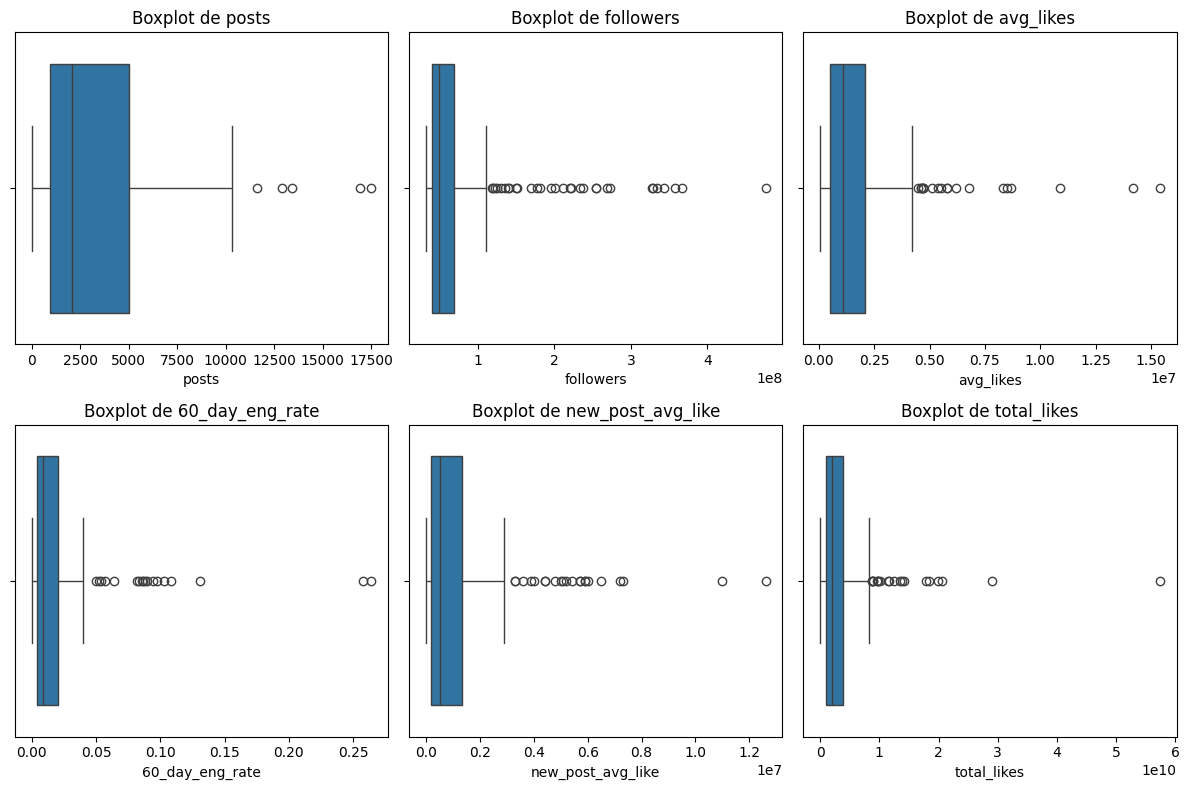

Número de registros antes de remover outliers: 200
Número de registros após remover outliers: 138


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

arquivo_path = '/content/drive/My Drive/top_insta_influencers_data.csv'

df = pd.read_csv(arquivo_path, sep=',', encoding='utf-8-sig')

def convert_value_to_numeric(valor):
    if isinstance(valor, str):
        if 'k' in valor:
            return float(valor.replace('k', '')) * 1000
        elif 'm' in valor:
            return float(valor.replace('m', '')) * 1e6
        elif 'b' in valor:
            return float(valor.replace('b', '')) * 1e9
        elif '%' in valor:
            return float(valor.replace('%', '')) / 100
    try:
        return float(valor)
    except ValueError:
        return np.nan

# Colunas de interesse
colunas = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
df[colunas] = df[colunas].applymap(convert_value_to_numeric)


# Função para detectar outliers utilizando o IQR
def detectar_outliers(df, colunas):
    outliers = {}

    for coluna in colunas:
        df_coluna = df[coluna].dropna()

        # Calculando o IQR
        Q1 = df_coluna.quantile(0.25)
        Q3 = df_coluna.quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificando outliers
        outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    return outliers

# Detectando e visualizando outliers nas colunas selecionadas
outliers_detectados = detectar_outliers(df, colunas)
plt.figure(figsize=(12, 8))

# Criando boxplots para cada uma das colunas de interesse
for i, coluna in enumerate(colunas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[coluna])
    plt.title(f"Boxplot de {coluna}")

plt.tight_layout()
plt.show()

df_sem_outliers = df.copy()

for coluna in colunas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar dados sem outliers
    df_sem_outliers = df_sem_outliers[(df_sem_outliers[coluna] >= limite_inferior) & (df_sem_outliers[coluna] <= limite_superior)]

# Verificar se os dados sem outliers têm o mesmo número de registros
print(f"Número de registros antes de remover outliers: {len(df)}")
print(f"Número de registros após remover outliers: {len(df_sem_outliers)}")



A análise dos boxplots revela uma alta concentração de dados em faixas menores, com outliers significativos em todas as métricas analisadas (posts, followers, avg_likes, 60_day_eng_rate, new_post_avg_like e total_likes). Esses outliers indicam contas excepcionais, como grandes influenciadores ou celebridades, com valores fora do padrão em seguidores, curtidas e engajamento.

Após a remoção de outliers, o número de registros foi reduzido de 200 para 138 (31%). Essa exclusão pode ser útil para focar em padrões da maioria, mas os outliers também são importantes para compreender casos de alto impacto.

# Histogramas

Foi gerado historiogramas para visualizar a distribuição das variáveis após a transformação logarítmica e a normalização, permitindo avaliar como as transformações impactaram a distribuição dos dados

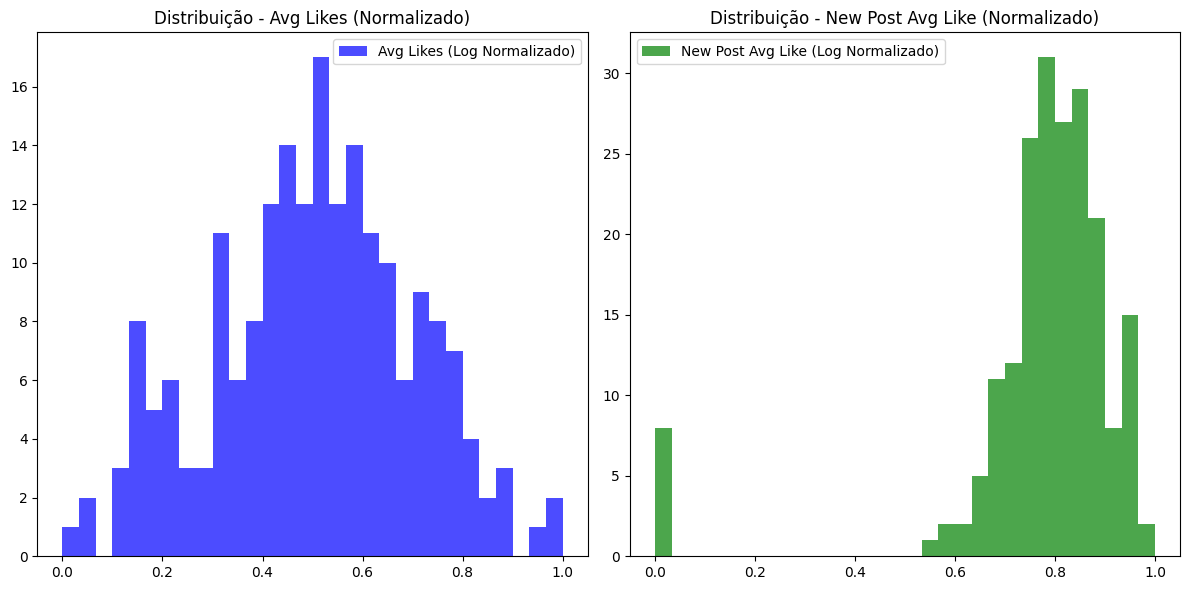

   avg_likes_log_norm  new_post_avg_like_log_norm
0              0.8955                      0.9595
1              0.8869                      0.9536
2              0.8505                      0.9356
3              0.8336                      0.9181
4              0.6172                      0.8201
5              0.7290                      0.9101
6              0.7391                      0.9283
7              0.7341                      0.8874
8              0.6599                      0.8404
9              0.6172                      0.8698


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

caminho_arquivo = '/content/drive/My Drive/top_insta_influencers_data.csv'
df = pd.read_csv(caminho_arquivo, sep=',', encoding='utf-8-sig')

def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)
    except ValueError:
        return value

columns_to_convert = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# 1. Transformação Logarítmica
df['avg_likes_log'] = np.log1p(df['avg_likes'])
df['new_post_avg_like_log'] = np.log1p(df['new_post_avg_like'])

# 2. Normalização
scaler = MinMaxScaler()
df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']] = scaler.fit_transform(
    df[['avg_likes_log', 'new_post_avg_like_log']]
)

# Visualização: Histogramas das variáveis transformadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['avg_likes_log_norm'], bins=30, alpha=0.7, color='blue', label='Avg Likes (Log Normalizado)')
plt.title("Distribuição - Avg Likes (Normalizado)")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['new_post_avg_like_log_norm'], bins=30, alpha=0.7, color='green', label='New Post Avg Like (Log Normalizado)')
plt.title("Distribuição - New Post Avg Like (Normalizado)")
plt.legend()

plt.tight_layout()
plt.show()

print(df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']].head(10))

Abaixo o código lida com a preparação dos dados para análise e treinamento de modelos.

Divide os dados em variáveis independentes (X) e dependentes (y), separando-as em conjuntos de treinamento (70%) e teste (30%) usando a função train_test_split.

Calcula o VIF (Variance Inflation Factor) para as variáveis independentes, ajudando a identificar possíveis problemas de multicolinearidade entre elas. O passo 8 organiza os dados em conjuntos completos de treinamento (train_data) e teste (test_data), que combinam as variáveis independentes e dependentes para facilitar a análise e o treinamento dos modelos preditivos.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

arquivo_path = '/content/drive/My Drive/top_insta_influencers_data.csv'
dados = pd.read_csv(arquivo_path, sep=',', encoding='utf-8-sig')

def converter_para_numero(valor):
    if isinstance(valor, str):
        if 'k' in valor:
            return float(valor.replace('k', '')) * 1e3
        elif 'm' in valor:
            return float(valor.replace('m', '')) * 1e6
        elif 'b' in valor:
            return float(valor.replace('b', '')) * 1e9
        elif '%' in valor:
            return float(valor.replace('%', '')) / 100
    try:
        return float(valor)
    except ValueError:
        return valor

colunas_para_converter = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate']
for coluna in colunas_para_converter:
    if coluna in dados.columns:
        dados[coluna] = dados[coluna].apply(converter_para_numero)

dados['avg_likes_log'] = np.log1p(dados['avg_likes'])
dados['new_post_avg_like_log'] = np.log1p(dados['new_post_avg_like'])

escalador = MinMaxScaler()
dados[['avg_likes_log_norm', 'new_post_avg_like_log_norm']] = escalador.fit_transform(
    dados[['avg_likes_log', 'new_post_avg_like_log']]
)

# Verificando se há valores NaN
print("Valores ausentes nas variáveis independentes:")
print(dados[['avg_likes_log_norm', 'new_post_avg_like_log_norm']].isna().sum())

print("Valores ausentes na variável dependente:")
print(dados['60_day_eng_rate'].isna().sum())

# Tratando valores NaN
dados = dados.dropna(subset=['avg_likes', 'new_post_avg_like', '60_day_eng_rate'])

# Dividindo os dados em conjunto de treinamento e teste
X = dados[['avg_likes_log_norm', 'new_post_avg_like_log_norm']]
y = dados['60_day_eng_rate']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Cálculo do VIF
vif_dados = pd.DataFrame()
vif_dados['Variável'] = X.columns
vif_dados['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nCálculo do VIF (Variance Inflation Factor):")
print(vif_dados)

# Treinando um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# validação cruzada
scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -scores

# Calculando a média e o desvio padrão do MSE
mse_medio = np.mean(mse_scores)
mse_std = np.std(mse_scores)

print("\nErro médio quadrático (MSE) após validação cruzada:")
print(f"MSE médio: {mse_medio:.4f}")
print(f"Desvio padrão do MSE: {mse_std:.4f}")
print("\nCoeficientes do modelo linear:")
print(modelo.coef_)


Valores ausentes nas variáveis independentes:
avg_likes_log_norm            0
new_post_avg_like_log_norm    0
dtype: int64
Valores ausentes na variável dependente:
1

Cálculo do VIF (Variance Inflation Factor):
                     Variável    VIF
0          avg_likes_log_norm 8.4563
1  new_post_avg_like_log_norm 8.4563

Erro médio quadrático (MSE) após validação cruzada:
MSE médio: 0.0009
Desvio padrão do MSE: 0.0005

Coeficientes do modelo linear:
[0.07992242 0.03966901]


Implementação do **Gradiente Descendente**: O código implementa o algoritmo de gradiente descendente para ajustar os parâmetros de uma regressão linear. A função de custo é o erro quadrático médio (MSE), e o gradiente é calculado e aplicado para atualizar os parâmetros (theta).

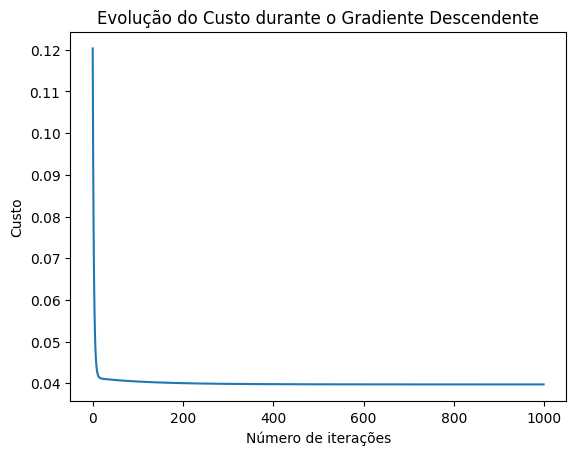

Theta otimizado: [ 0.4497009   0.04462734 -0.00709011  0.03752498]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de dados fictícios
X_treino_ = np.random.rand(140, 3)
y_treino = np.random.rand(140)

# Adicionando a coluna de 1s para o termo de viés
X_ = np.c_[np.ones(X_treino_.shape[0]), X_treino_]

# Inicializando os parâmetros theta
theta_inicial = np.zeros(X_.shape[1])

# Função de custo (erro quadrático médio)
def custo(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

# Gradiente Descendente
def gradiente_descendente(X, y, theta, taxa_aprendizado, num_iteracoes):
    m = len(y)
    custo_hist = np.zeros(num_iteracoes)

    for i in range(num_iteracoes):
        gradiente = (1 / m) * np.dot(X.T, np.dot(X, theta) - y)
        theta = theta - taxa_aprendizado * gradiente
        custo_hist[i] = custo(X, y, theta)

    return theta, custo_hist

# Parâmetros para o gradiente descendente
taxa_aprendizado = 0.1
num_iteracoes = 1000

theta_otimizado, custo_hist = gradiente_descendente(X_, y_treino, theta_inicial, taxa_aprendizado, num_iteracoes)

# Plotando a evolução do custo
plt.plot(range(num_iteracoes), custo_hist)
plt.xlabel('Número de iterações')
plt.ylabel('Custo')
plt.title('Evolução do Custo durante o Gradiente Descendente')
plt.show()

print("Theta otimizado:", theta_otimizado)

Eficiência: O gradiente descendente foi eficaz na otimização de theta, convergindo para valores que minimizam o custo.
Velocidade de Convergência: A taxa de aprendizado escolhida (0.1) proporcionou uma boa velocidade de convergência, evitando oscilações ou convergência lenta.

In [20]:
import numpy as np

# Função de gradiente descendente
def gradiente_descendente(X, y, theta, taxa_aprendizado, num_iteracoes):
    m = len(y)
    custo_hist = []
    for i in range(num_iteracoes):
        erro = np.dot(X, theta) - y
        gradiente = (1/m) * np.dot(X.T, erro)
        theta = theta - taxa_aprendizado * gradiente
        custo = (1/(2*m)) * np.dot(erro.T, erro)
        custo_hist.append(custo)
    return theta, custo_hist

# Exemplo de dados e inicialização de parâmetros
X_treino = np.random.rand(100, 3)  # 100 amostras e 3 características
y_treino = np.random.rand(100, 1)  # 100 valores reais
theta_inicial = np.zeros((3, 1))  # Inicializando theta com zeros

# Ajuste de hiperparâmetros
taxas_aprendizado = [0.1, 0.01, 0.001]
num_iteracoes = [100, 200, 500]

melhor_custo = float('inf')
melhor_taxa = None
melhor_num_iteracoes = None
melhor_theta = None

# Testando diferentes combinações de hiperparâmetros
for taxa in taxas_aprendizado:
    for num_iter in num_iteracoes:
        theta_otimizado, custo_hist = gradiente_descendente(X_treino, y_treino, theta_inicial, taxa, num_iter)
        custo_final = custo_hist[-1]
        print(f"Taxa de aprendizado: {taxa}, Iterações: {num_iter}, Custo final: {custo_final}")

        if custo_final < melhor_custo:
            melhor_custo = custo_final
            melhor_taxa = taxa
            melhor_num_iteracoes = num_iter
            melhor_theta = theta_otimizado

print(f"\nMelhores hiperparâmetros encontrados: Taxa = {melhor_taxa}, Iterações = {melhor_num_iteracoes}")
print(f"Melhor theta: {melhor_theta}")

Taxa de aprendizado: 0.1, Iterações: 100, Custo final: [[0.05697435]]
Taxa de aprendizado: 0.1, Iterações: 200, Custo final: [[0.05652389]]
Taxa de aprendizado: 0.1, Iterações: 500, Custo final: [[0.05635384]]
Taxa de aprendizado: 0.01, Iterações: 100, Custo final: [[0.07433651]]
Taxa de aprendizado: 0.01, Iterações: 200, Custo final: [[0.06009534]]
Taxa de aprendizado: 0.01, Iterações: 500, Custo final: [[0.05752614]]
Taxa de aprendizado: 0.001, Iterações: 100, Custo final: [[0.15987634]]
Taxa de aprendizado: 0.001, Iterações: 200, Custo final: [[0.1409939]]
Taxa de aprendizado: 0.001, Iterações: 500, Custo final: [[0.10290753]]

Melhores hiperparâmetros encontrados: Taxa = 0.1, Iterações = 500
Melhor theta: [[0.48153617]
 [0.24827953]
 [0.10928413]]


Impacto da Taxa de Aprendizado:

Taxas mais altas (0.1) resultaram em uma convergência mais rápida e menor custo final. Taxas mais baixas (0.001) apresentaram convergência mais lenta e custos finais mais elevados.

Impacto do Número de Iterações:
Aumentar o número de iterações contribuiu para a redução do custo, especialmente em taxas de aprendizado intermediárias ou baixas.

Melhor Desempenho:
A taxa de aprendizado de 0.1 e o número de iterações de 500 apresentaram o melhor equilíbrio entre convergência e custo final.

# Avaliação da Performance: R², MSE e MAE

Valores ausentes antes do tratamento:
ï»¿rank              0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      1
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

Desempenho do Modelo:
- MAE (Erro Absoluto Médio): 0.0162
- MSE (Erro Quadrático Médio): 0.0010
- R² (Coeficiente de Determinação): 0.3357

Coeficientes do Modelo:
                     Variável  Coeficiente
0          avg_likes_log_norm       0.0656
1  new_post_avg_like_log_norm       0.0419

Intercepto: -0.04805430307998624


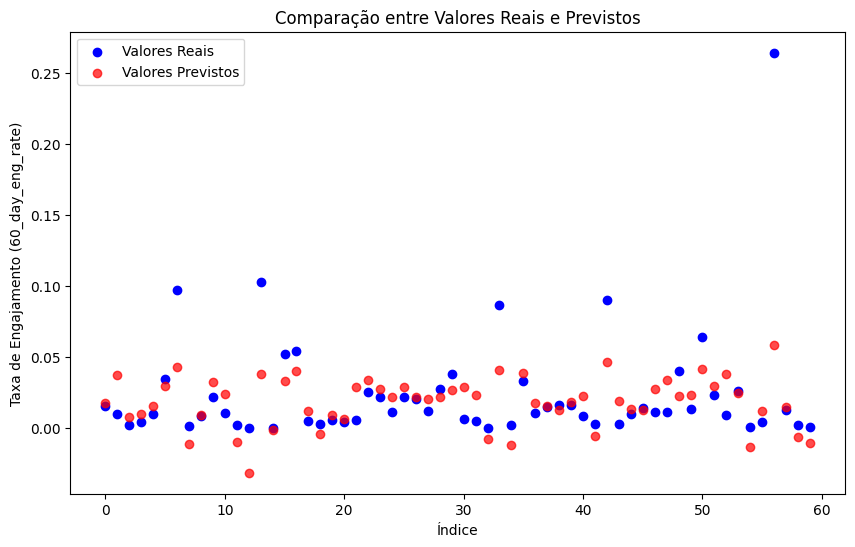

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

arquivo = '/content/drive/My Drive/top_insta_influencers_data.csv'
dados = pd.read_csv(arquivo, sep=',', encoding='utf-8-sig')

def converter_para_numero(valor):
    if isinstance(valor, str):
        if 'k' in valor:
            return float(valor.replace('k', '')) * 1e3
        elif 'm' in valor:
            return float(valor.replace('m', '')) * 1e6
        elif 'b' in valor:
            return float(valor.replace('b', '')) * 1e9
        elif '%' in valor:
            return float(valor.replace('%', '')) / 100
    try:
        return float(valor)
    except ValueError:
        return valor

colunas_a_converter = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate']
for coluna in colunas_a_converter:
    if coluna in dados.columns:
        dados[coluna] = dados[coluna].apply(converter_para_numero)

if 'country' in dados.columns:
    dados['country'] = dados['country'].fillna('desconhecido')

print("Valores ausentes antes do tratamento:")
print(dados.isnull().sum())

dados['avg_likes_log'] = np.log1p(dados['avg_likes'])
dados['new_post_avg_like_log'] = np.log1p(dados['new_post_avg_like'])

normalizador = MinMaxScaler()
dados[['avg_likes_log_norm', 'new_post_avg_like_log_norm']] = normalizador.fit_transform(
    dados[['avg_likes_log', 'new_post_avg_like_log']]
)

X = dados[['avg_likes_log_norm', 'new_post_avg_like_log_norm']]
y = dados['60_day_eng_rate']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Substituir valores ausentes na variável dependente pelos valores médios
y_treino.fillna(y_treino.mean(), inplace=True)
y_teste.fillna(y_teste.mean(), inplace=True)

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Realizar previsões com os dados de teste
y_pred = modelo.predict(X_teste)

# Avaliar a performance do modelo usando métricas
erro_absoluto = mean_absolute_error(y_teste, y_pred)
erro_quadratico = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print("\nDesempenho do Modelo:")
print(f"- MAE (Erro Absoluto Médio): {erro_absoluto:.4f}")
print(f"- MSE (Erro Quadrático Médio): {erro_quadratico:.4f}")
print(f"- R² (Coeficiente de Determinação): {r2:.4f}")

# Exibir os coeficientes do modelo
coeficientes_modelo = pd.DataFrame({
    'Variável': X_treino.columns,
    'Coeficiente': modelo.coef_
})
print("\nCoeficientes do Modelo:")
print(coeficientes_modelo)

# Exibir o intercepto do modelo
print(f"\nIntercepto: {modelo.intercept_}")

# Plotar os valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_teste)), y_teste, label='Valores Reais', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Valores Previstos', color='red', alpha=0.7)
plt.legend()
plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Índice")
plt.ylabel("Taxa de Engajamento (60_day_eng_rate)")
plt.show()


O valor de R² (0.3357) indica que o modelo explica cerca de 33,57% da variância nos dados, sugerindo que existem outros fatores importantes para explicar a taxa de engajamento.
As métricas MAE e MSE indicam que o erro médio é baixo em termos absolutos, o que sugere previsões consistentes dentro do conjunto de teste

# Impacto das Variáveis: Interpretação dos Coeficientes de Regressão

O conjunto de dados é dividido em treino e teste, e o modelo de regressão linear é treinado com os dados de treino. Após o treinamento, o modelo faz previsões para os dados de teste, e o desempenho é avaliado com métricas como erro absoluto médio (MAE), erro quadrático médio (MSE) e o coeficiente de determinação (R²).

Por fim, o código exibe os coeficientes do modelo e plota uma comparação entre os valores reais e previstos da taxa de engajamento.


Desempenho do Modelo:
- MAE (Erro Absoluto Médio): 0.0144
- MSE (Erro Quadrático Médio): 0.0008
- R² (Coeficiente de Determinação): 0.4723

Coeficientes do Modelo:
                    Variáveis  Coeficientes
0          avg_likes_log_norm        0.0883
1  new_post_avg_like_log_norm        0.0490
2          followers_log_norm       -0.0513
3    influence_score_log_norm        0.0145

Intercepto do Modelo: -0.06597941249876621


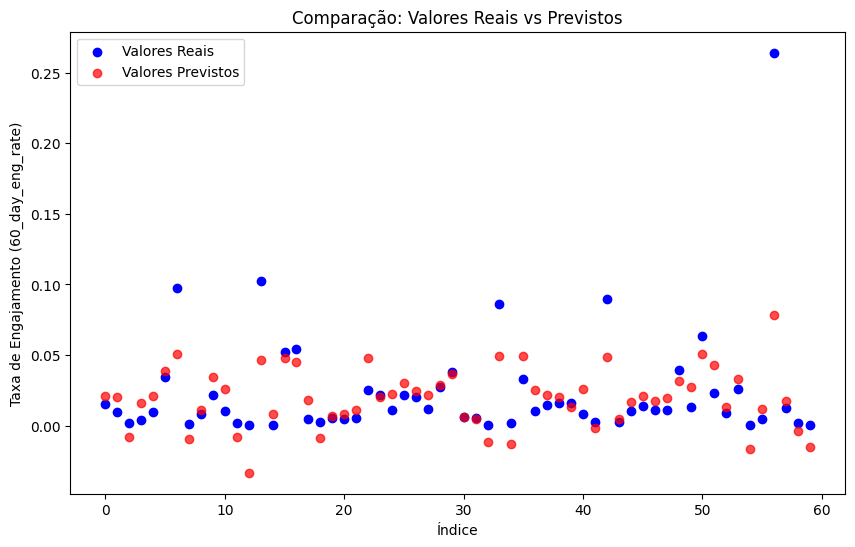

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/top_insta_influencers_data.csv'
data = pd.read_csv(file_path, sep=',', encoding='utf-8-sig')

def parse_numbers(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)
    except ValueError:
        return value

columns_to_adjust = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate', 'followers', 'influence_score']
for column in columns_to_adjust:
    if column in data.columns:
        data[column] = data[column].apply(parse_numbers)

if 'country' in data.columns:
    data['country'] = data['country'].fillna('desconhecido')

data['avg_likes_log'] = np.log1p(data['avg_likes'])
data['new_post_avg_like_log'] = np.log1p(data['new_post_avg_like'])
data['followers_log'] = np.log1p(data['followers'])
data['influence_score_log'] = np.log1p(data['influence_score'])

# Normalizando as colunas transformadas com MinMaxScaler
scaler = MinMaxScaler()
data[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm']] = scaler.fit_transform(
    data[['avg_likes_log', 'new_post_avg_like_log', 'followers_log', 'influence_score_log']]
)

# Definindo as variáveis independentes (X) e dependentes (y)
X = data[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm']]
y = data['60_day_eng_rate']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Substituindo valores nulos na variável dependente (y) pela média
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Inicializando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nDesempenho do Modelo:")
print(f"- MAE (Erro Absoluto Médio): {mae:.4f}")
print(f"- MSE (Erro Quadrático Médio): {mse:.4f}")
print(f"- R² (Coeficiente de Determinação): {r2:.4f}")

# Exibindo os coeficientes do modelo de regressão linear
coef_table = pd.DataFrame({
    'Variáveis': X_train.columns,
    'Coeficientes': model.coef_
})
print("\nCoeficientes do Modelo:")
print(coef_table)
print(f"\nIntercepto do Modelo: {model.intercept_}")

# Visualizando a comparação entre os valores reais e os previstos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Reais', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Valores Previstos', color='red', alpha=0.7)
plt.legend()
plt.title("Comparação: Valores Reais vs Previstos")
plt.xlabel("Índice")
plt.ylabel("Taxa de Engajamento (60_day_eng_rate)")
plt.show()


Desempenho do Modelo:

MAE: 0.0144 (erro médio baixo, boa precisão)
MSE: 0.0008
R²: 0.4723 (modelo explica 47,23% da variância dos dados)
Impacto das Variáveis:

avg_likes_log_norm (+): Maior impacto positivo no engajamento.

followers_log_norm (-): Impacto negativo, sugerindo que mais seguidores podem reduzir engajamento.

new_post_avg_like_log_norm e influence_score_log_norm: Impacto menor, mas positivo.